In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

Using TensorFlow backend.


In [2]:
# dimensions of our images.

img_width, img_height = 224, 224

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

nb_train_samples = 2000
nb_validation_samples = 800

epochs = 20
batch_size = 20

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

W0827 10:41:10.890360  7760 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 10:41:10.905981  7760 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 10:41:10.905981  7760 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 10:41:10.921601  7760 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4255: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 10:41:10.952846  7760 deprecation_wrapper.py:119] From C:\Users\atuls\Ana

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0827 10:41:10.988091  7760 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 10:41:11.000273  7760 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.

W0827 10:41:11.000273  7760 deprecation.py:323] From C:\Users\atuls\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)
print(validation_generator.class_indices)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [9]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# save model and architecture to single file
model.save("full_model.h5")
print("Saved full model to disk")

Epoch 1/20
100/100 [==============================] - 98s 982ms/step - loss: 0.7118 - acc: 0.5245 - val_loss: 0.6887 - val_acc: 0.5150
Epoch 2/20
100/100 [==============================] - 96s 955ms/step - loss: 0.6872 - acc: 0.5585 - val_loss: 0.6898 - val_acc: 0.5212
Epoch 3/20
100/100 [==============================] - 96s 960ms/step - loss: 0.6947 - acc: 0.5345 - val_loss: 0.6848 - val_acc: 0.5325
Epoch 4/20
100/100 [==============================] - 95s 953ms/step - loss: 0.6888 - acc: 0.5580 - val_loss: 0.6822 - val_acc: 0.6100
Epoch 5/20
100/100 [==============================] - 92s 921ms/step - loss: 0.6800 - acc: 0.5850 - val_loss: 0.6888 - val_acc: 0.5950
Epoch 6/20
100/100 [==============================] - 91s 909ms/step - loss: 0.6756 - acc: 0.6060 - val_loss: 0.6679 - val_acc: 0.6175
Epoch 7/20
100/100 [==============================] - 92s 917ms/step - loss: 0.6586 - acc: 0.6385 - val_loss: 0.6367 - val_acc: 0.6487
Epoch 8/20
100/100 [==============================] - 9

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


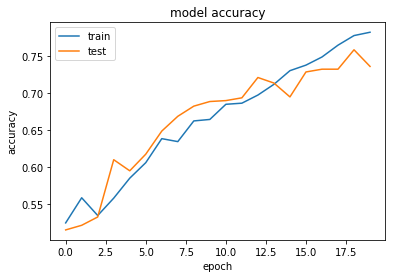

In [10]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

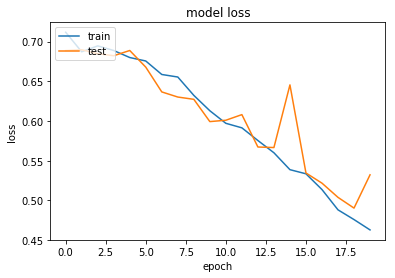

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [13]:
from keras.models import load_model
 
# load model
full_model = load_model('full_model.h5')
# summarize model.
full_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)       

In [14]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.5322628060355783, 0.7362499994784594]